<a href="https://colab.research.google.com/github/smtwtfs/WiDS_Datathon/blob/2025/notebooks/ye.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [16]:
# load library

import numpy as np
import pandas as pd
import seaborn as sns

import os
import matplotlib.pyplot as plt

import sklearn
from sklearn.svm import SVC
from sklearn.metrics import balanced_accuracy_score, roc_auc_score, accuracy_score, confusion_matrix, roc_curve
from scipy.stats import zscore, pearsonr, uniform
from sklearn.linear_model import Ridge
from sklearn.model_selection import KFold, StratifiedKFold, RandomizedSearchCV

from scipy.io import loadmat

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score

# Read train data

In [4]:
train_metrices = pd.read_csv('/content/drive/MyDrive/WiDS_datathon_2025/TRAIN/TRAIN_FUNCTIONAL_CONNECTOME_MATRICES.csv')


In [5]:
train_metrices.head()

,participant_id,0throw_1thcolumn,0throw_2thcolumn,0throw_3thcolumn,0throw_4thcolumn,0throw_5thcolumn,0throw_6thcolumn,0throw_7thcolumn,0throw_8thcolumn,0throw_9thcolumn,...,195throw_196thcolumn,195throw_197thcolumn,195throw_198thcolumn,195throw_199thcolumn,196throw_197thcolumn,196throw_198thcolumn,196throw_199thcolumn,197throw_198thcolumn,197throw_199thcolumn,198throw_199thcolumn
0,70z8Q2xdTXM3,0.093473,0.146902,0.067893,0.015141,0.070221,0.063997,0.055382,-0.035335,0.068583,...,0.003404,-0.010359,-0.050968,-0.014365,0.128066,0.112646,-0.058980,0.028228,0.133582,0.143372
1,WHWymJu6zNZi,0.029580,0.179323,0.112933,0.038291,0.104899,0.064250,0.008488,0.077505,-0.004750,...,-0.008409,-0.008479,0.020891,0.017754,0.094040,0.035141,0.032537,0.075007,0.115350,0.138200
2,4PAQp1M6EyAo,-0.051580,0.139734,0.068295,0.046991,0.111085,0.026978,0.151377,0.021198,0.083721,...,0.053245,-0.028003,0.028773,0.024556,0.166343,0.058925,0.035485,0.063661,0.042862,0.162162
3,obEacy4Of68I,0.016273,0.204702,0.115980,0.043103,0.056431,0.057615,0.055773,0.075030,0.001033,...,-0.023918,-0.005356,0.018607,0.016193,0.072955,0.130135,0.056120,0.084784,0.114148,0.190584
4,s7WzzDcmDOhF,0.065771,0.098714,0.097604,0.112988,0.071139,0.085607,0.019392,-0.036403,-0.020375,...,0.066439,-0.076680,-0.047530,-0.031443,0.221213,0.007343,0.005763,0.083820,0.079582,0.067269


In [6]:
train_solution = pd.read_excel('/content/drive/MyDrive/WiDS_datathon_2025/TRAIN/TRAINING_SOLUTIONS.xlsx')


In [7]:
train_solution.head()

,participant_id,ADHD_Outcome,Sex_F
0,UmrK0vMLopoR,1,1
1,CPaeQkhcjg7d,1,0
2,Nb4EetVPm3gs,1,0
3,p4vPhVu91o4b,1,1
4,M09PXs7arQ5E,1,1


In [8]:
train_categorical = pd.read_excel('/content/drive/MyDrive/WiDS_datathon_2025/TRAIN/TRAIN_CATEGORICAL_METADATA.xlsx')


In [ ]:
train_categorical

,participant_id,Basic_Demos_Enroll_Year,Basic_Demos_Study_Site,PreInt_Demos_Fam_Child_Ethnicity,PreInt_Demos_Fam_Child_Race,MRI_Track_Scan_Location,Barratt_Barratt_P1_Edu,Barratt_Barratt_P1_Occ,Barratt_Barratt_P2_Edu,Barratt_Barratt_P2_Occ
0,UmrK0vMLopoR,2016,1,0.0,0,1,21,45,21,45
1,CPaeQkhcjg7d,2019,3,1.0,2,3,15,15,0,0
2,Nb4EetVPm3gs,2016,1,1.0,8,1,18,40,0,0
3,p4vPhVu91o4b,2018,3,0.0,8,3,15,30,18,0
4,M09PXs7arQ5E,2019,3,0.0,1,3,15,20,0,0
...,...,...,...,...,...,...,...,...,...,...
1208,Atx7oub96GXS,2019,1,0.0,0,2,21,40,21,40
1209,groSbUfkQngM,2016,1,0.0,0,1,18,35,0,0
1210,zmxGvIrOD0bt,2015,1,1.0,2,1,18,20,0,0
1211,rOmWFuJCud5G,2018,3,0.0,8,3,21,40,18,45


In [9]:
train_quantitative = pd.read_excel('/content/drive/MyDrive/WiDS_datathon_2025/TRAIN/TRAIN_QUANTITATIVE_METADATA.xlsx')


In [ ]:
train_quantitative.head()

,participant_id,EHQ_EHQ_Total,ColorVision_CV_Score,APQ_P_APQ_P_CP,APQ_P_APQ_P_ID,APQ_P_APQ_P_INV,APQ_P_APQ_P_OPD,APQ_P_APQ_P_PM,APQ_P_APQ_P_PP,SDQ_SDQ_Conduct_Problems,SDQ_SDQ_Difficulties_Total,SDQ_SDQ_Emotional_Problems,SDQ_SDQ_Externalizing,SDQ_SDQ_Generating_Impact,SDQ_SDQ_Hyperactivity,SDQ_SDQ_Internalizing,SDQ_SDQ_Peer_Problems,SDQ_SDQ_Prosocial,MRI_Track_Age_at_Scan
0,UmrK0vMLopoR,40.00,13,3,10,47,13,11,28,0,6,1,5,0,5,1,0,10,NaN
1,CPaeQkhcjg7d,-94.47,14,3,13,34,18,23,30,0,18,6,8,7,8,10,4,5,NaN
2,Nb4EetVPm3gs,-46.67,14,4,10,35,16,10,29,1,14,2,8,5,7,6,4,9,8.239904
3,p4vPhVu91o4b,-26.68,10,5,12,39,19,16,28,6,24,4,16,9,10,8,4,6,NaN
4,M09PXs7arQ5E,0.00,14,5,15,40,20,24,28,1,18,4,11,4,10,7,3,9,8.940679


# Read test data

In [ ]:
test_metrices = pd.read_csv('/content/drive/MyDrive/WiDS_datathon_2025/TEST/TEST_FUNCTIONAL_CONNECTOME_MATRICES.csv')
train_categorical=pd.read_excel('/content/drive/MyDrive/WiDS_datathon_2025/TEST/TEST_CATEGORICAL.xlsx')
train_quantitative=pd.read_excel('/content/drive/MyDrive/WiDS_datathon_2025/TEST/TEST_QUANTITATIVE_METADATA.xlsx')


# Exploratory Data Analysis

In [10]:
# get shape and data type
def initial_analysis(df):
    """
    Given a dataframe produces a simple report on initial data analytics
    Params:
        - df
    Returns:
        - Shape of dataframe records and columns
        - Columns and data types
    """
    print('Report of Initial Data Analysis:\n')
    print(f'Shape of dataframe: {df.shape}')
    print(f'Features and Data Types: \n {df.dtypes}')

In [ ]:
initial_analysis(train_solution)

Report of Initial Data Analysis:

Shape of dataframe: (1213, 3)
Features and Data Types: 
 participant_id    object
ADHD_Outcome       int64
Sex_F              int64
dtype: object


In [ ]:
initial_analysis(train_quantitative)


Report of Initial Data Analysis:

Shape of dataframe: (1213, 19)
Features and Data Types: 
 participant_id                 object
EHQ_EHQ_Total                 float64
ColorVision_CV_Score            int64
APQ_P_APQ_P_CP                  int64
APQ_P_APQ_P_ID                  int64
APQ_P_APQ_P_INV                 int64
APQ_P_APQ_P_OPD                 int64
APQ_P_APQ_P_PM                  int64
APQ_P_APQ_P_PP                  int64
SDQ_SDQ_Conduct_Problems        int64
SDQ_SDQ_Difficulties_Total      int64
SDQ_SDQ_Emotional_Problems      int64
SDQ_SDQ_Externalizing           int64
SDQ_SDQ_Generating_Impact       int64
SDQ_SDQ_Hyperactivity           int64
SDQ_SDQ_Internalizing           int64
SDQ_SDQ_Peer_Problems           int64
SDQ_SDQ_Prosocial               int64
MRI_Track_Age_at_Scan         float64
dtype: object


In [11]:
# check missing data

def percent_missing(df):
    """
    Given a dataframe it calculates the percentage of missing records per column
    Params:
        - df
    Returns:
        - Dictionary of column name and percentage of missing records
    """
    col=list(df.columns)
    perc=[round(df[c].isna().mean()*100,2) for c in col]
    miss_dict=dict(zip(col,perc))
    return miss_dict

In [ ]:
percent_missing(train_quantitative)

{'participant_id': 0.0,
 'EHQ_EHQ_Total': 0.0,
 'ColorVision_CV_Score': 0.0,
 'APQ_P_APQ_P_CP': 0.0,
 'APQ_P_APQ_P_ID': 0.0,
 'APQ_P_APQ_P_INV': 0.0,
 'APQ_P_APQ_P_OPD': 0.0,
 'APQ_P_APQ_P_PM': 0.0,
 'APQ_P_APQ_P_PP': 0.0,
 'SDQ_SDQ_Conduct_Problems': 0.0,
 'SDQ_SDQ_Difficulties_Total': 0.0,
 'SDQ_SDQ_Emotional_Problems': 0.0,
 'SDQ_SDQ_Externalizing': 0.0,
 'SDQ_SDQ_Generating_Impact': 0.0,
 'SDQ_SDQ_Hyperactivity': 0.0,
 'SDQ_SDQ_Internalizing': 0.0,
 'SDQ_SDQ_Peer_Problems': 0.0,
 'SDQ_SDQ_Prosocial': 0.0,
 'MRI_Track_Age_at_Scan': 29.68}

In [ ]:
percent_missing(train_categorical)

{'participant_id': 0.0,
 'Basic_Demos_Enroll_Year': 0.0,
 'Basic_Demos_Study_Site': 0.0,
 'PreInt_Demos_Fam_Child_Ethnicity': 0.91,
 'PreInt_Demos_Fam_Child_Race': 0.0,
 'MRI_Track_Scan_Location': 0.0,
 'Barratt_Barratt_P1_Edu': 0.0,
 'Barratt_Barratt_P1_Occ': 0.0,
 'Barratt_Barratt_P2_Edu': 0.0,
 'Barratt_Barratt_P2_Occ': 0.0}

In [ ]:
# Two missing columns need attention:
# 'MRI_Track_Age_at_Scan': 29.68% missing
# 'PreInt_Demos_Fam_Child_Ethnicity': 0.91% missing

In [ ]:
train_quantitative.describe()

,EHQ_EHQ_Total,ColorVision_CV_Score,APQ_P_APQ_P_CP,APQ_P_APQ_P_ID,APQ_P_APQ_P_INV,APQ_P_APQ_P_OPD,APQ_P_APQ_P_PM,APQ_P_APQ_P_PP,SDQ_SDQ_Conduct_Problems,SDQ_SDQ_Difficulties_Total,SDQ_SDQ_Emotional_Problems,SDQ_SDQ_Externalizing,SDQ_SDQ_Generating_Impact,SDQ_SDQ_Hyperactivity,SDQ_SDQ_Internalizing,SDQ_SDQ_Peer_Problems,SDQ_SDQ_Prosocial,MRI_Track_Age_at_Scan
count,1213.000000,1213.000000,1213.000000,1213.000000,1213.000000,1213.000000,1213.000000,1213.000000,1213.000000,1213.000000,1213.000000,1213.000000,1213.000000,1213.000000,1213.000000,1213.000000,1213.000000,853.000000
mean,58.876917,13.164880,3.781533,13.205276,39.374279,17.785655,16.393240,25.246496,2.059357,12.122836,2.307502,7.557296,4.073372,5.497939,4.565540,2.258038,7.683430,11.245678
std,49.855501,2.780624,1.376700,3.811772,6.245928,3.764112,5.376994,3.950529,2.023322,6.577207,2.167549,4.166627,2.819731,2.836764,3.519634,2.090414,2.190295,3.234372
min,-100.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,45.600000,14.000000,3.000000,11.000000,36.000000,16.000000,13.000000,23.000000,0.000000,7.000000,1.000000,4.000000,2.000000,4.000000,2.000000,0.000000,6.000000,8.803901
50%,76.670000,14.000000,3.000000,13.000000,40.000000,18.000000,16.000000,26.000000,2.000000,12.000000,2.000000,7.000000,4.000000,6.000000,4.000000,2.000000,8.000000,10.739219
75%,93.400000,14.000000,4.000000,16.000000,43.000000,20.000000,19.000000,28.000000,3.000000,17.000000,4.000000,10.000000,6.000000,8.000000,7.000000,4.000000,10.000000,13.460871
max,100.000000,14.000000,12.000000,28.000000,50.000000,28.000000,37.000000,30.000000,10.000000,34.000000,10.000000,20.000000,10.000000,10.000000,17.000000,9.000000,10.000000,21.564453


In [12]:
train_quantitative.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1213 entries, 0 to 1212
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   participant_id              1213 non-null   object 
 1   EHQ_EHQ_Total               1213 non-null   float64
 2   ColorVision_CV_Score        1213 non-null   int64  
 3   APQ_P_APQ_P_CP              1213 non-null   int64  
 4   APQ_P_APQ_P_ID              1213 non-null   int64  
 5   APQ_P_APQ_P_INV             1213 non-null   int64  
 6   APQ_P_APQ_P_OPD             1213 non-null   int64  
 7   APQ_P_APQ_P_PM              1213 non-null   int64  
 8   APQ_P_APQ_P_PP              1213 non-null   int64  
 9   SDQ_SDQ_Conduct_Problems    1213 non-null   int64  
 10  SDQ_SDQ_Difficulties_Total  1213 non-null   int64  
 11  SDQ_SDQ_Emotional_Problems  1213 non-null   int64  
 12  SDQ_SDQ_Externalizing       1213 non-null   int64  
 13  SDQ_SDQ_Generating_Impact   1213 

In [ ]:
train_solution.describe()

,ADHD_Outcome,Sex_F
count,1213.000000,1213.000000
mean,0.685078,0.342951
std,0.464676,0.474891
min,0.000000,0.000000
25%,0.000000,0.000000
50%,1.000000,0.000000
75%,1.000000,1.000000
max,1.000000,1.000000


# Understand the target variable

In [14]:
# correlation: -0.130836

corr_table = train_solution[['ADHD_Outcome','Sex_F']].corr(method='pearson')
print(corr_table)

# svm = sns.heatmap(corr_table)
# figure = svm.get_figure()
# figure.savefig('Correlation.png', dpi=300, bbox_inches='tight')



              ADHD_Outcome     Sex_F
ADHD_Outcome      1.000000 -0.130836
Sex_F            -0.130836  1.000000


In [ ]:
# in traning set, more men than women; also more men are ADHD
# imbalance data.

value_counts = train_solution[['ADHD_Outcome','Sex_F']].value_counts()

# Calculate percentages
percentages = value_counts / len(train_solution) * 100

# Display results
print("Unique Values:\n", value_counts)
print("\nPercentages:\n", percentages)

Unique Values:
 ADHD_Outcome  Sex_F
1             0        581
              1        250
0             0        216
              1        166
Name: count, dtype: int64

Percentages:
 ADHD_Outcome  Sex_F
1             0        47.897774
              1        20.610058
0             0        17.807090
              1        13.685078
Name: count, dtype: float64


# Understand the categorical data

In [ ]:
# check how many different answers in each columns

train_categorical.nunique()

    #   print (train_categorical[i] .value_counts())
    #   print (train_categorical[i].value_counts(normalize=True) * 100)

,0
participant_id,1213
Basic_Demos_Enroll_Year,6
Basic_Demos_Study_Site,4
PreInt_Demos_Fam_Child_Ethnicity,4
PreInt_Demos_Fam_Child_Race,10
MRI_Track_Scan_Location,5
Barratt_Barratt_P1_Edu,8
Barratt_Barratt_P1_Occ,10
Barratt_Barratt_P2_Edu,8
Barratt_Barratt_P2_Occ,10


In [13]:
# for specific column, check different answers and frequency

train_categorical['Barratt_Barratt_P1_Edu'].value_counts()

,count
Barratt_Barratt_P1_Edu,
21,470
18,421
15,162
12,97
9,28
0,15
6,15
3,5


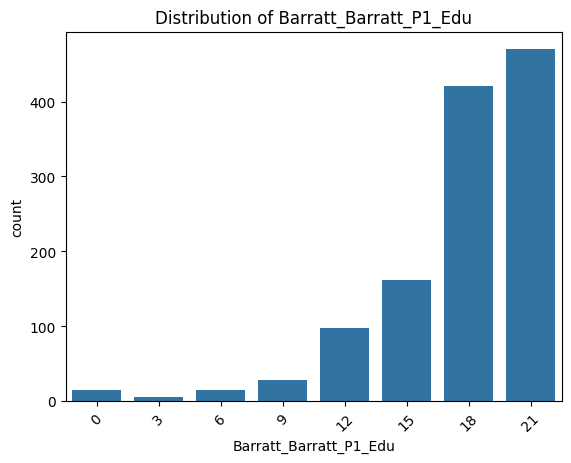

In [17]:
# visulize distribution

sns.countplot(x='Barratt_Barratt_P1_Edu', data=train_categorical[['Barratt_Barratt_P1_Edu']])
plt.title(f"Distribution of Barratt_Barratt_P1_Edu")
plt.xticks(rotation=45)
plt.show()

# Understand Quantitative Variable

In [ ]:
list(train_quantitative)[1:]

['EHQ_EHQ_Total',
 'ColorVision_CV_Score',
 'APQ_P_APQ_P_CP',
 'APQ_P_APQ_P_ID',
 'APQ_P_APQ_P_INV',
 'APQ_P_APQ_P_OPD',
 'APQ_P_APQ_P_PM',
 'APQ_P_APQ_P_PP',
 'SDQ_SDQ_Conduct_Problems',
 'SDQ_SDQ_Difficulties_Total',
 'SDQ_SDQ_Emotional_Problems',
 'SDQ_SDQ_Externalizing',
 'SDQ_SDQ_Generating_Impact',
 'SDQ_SDQ_Hyperactivity',
 'SDQ_SDQ_Internalizing',
 'SDQ_SDQ_Peer_Problems',
 'SDQ_SDQ_Prosocial',
 'MRI_Track_Age_at_Scan']

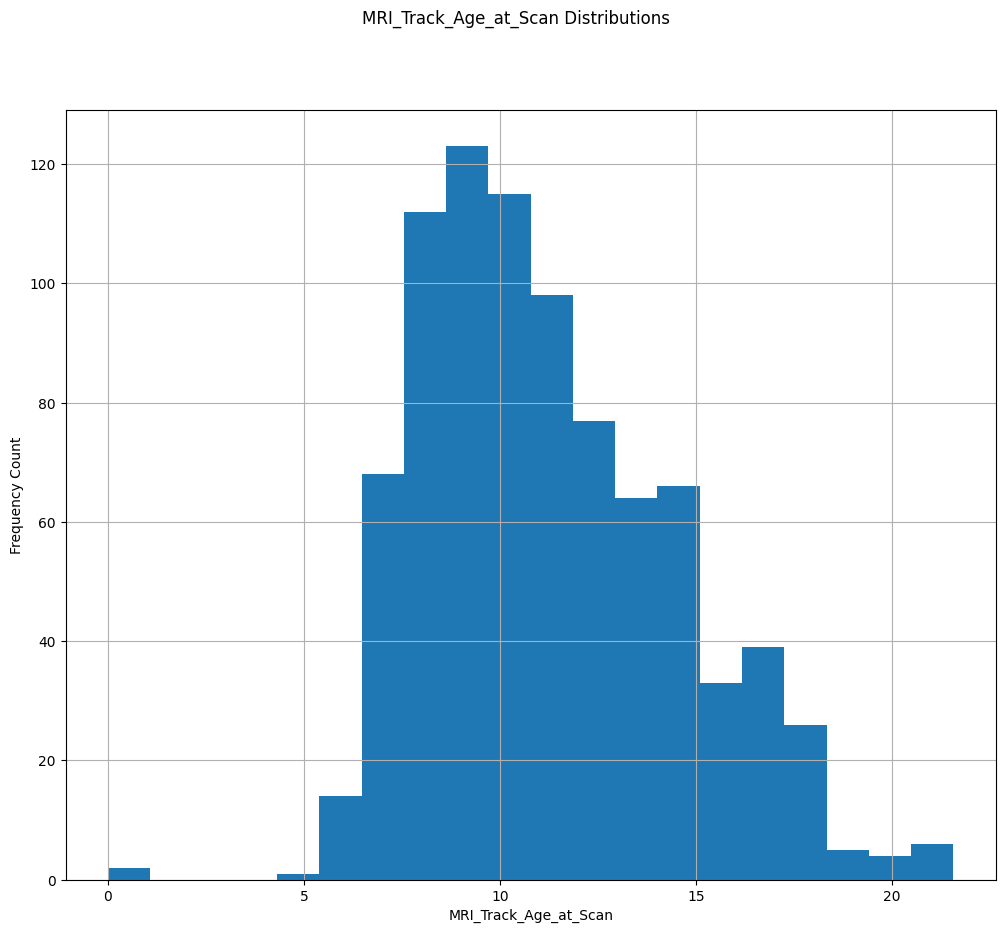

In [18]:
# visulization

# Distribution of MRI_Track_Age_at_Scan
train_quantitative['MRI_Track_Age_at_Scan'].hist(figsize=(12, 10), bins=20)
plt.suptitle("MRI_Track_Age_at_Scan Distributions")
plt.xlabel('MRI_Track_Age_at_Scan')
plt.ylabel('Frequency Count')
plt.show()